### COVID-19 EXPLORATORY DATA ANALYSIS #
#### Code by Diedre Brown, diedre@diedrebrown.com #

#### AIM:
#### This is an exploratory data analysis to understand the John Hopkins's dataset  on COVID-19 at 
#### https://github.com/CSSEGISandData/COVID-19

### IMPORT MODULES

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# layout to a colorblind friendly palette
plt.style.use("seaborn-colorblind")

In [49]:
import plotly.express as px
import plotly.graph_objects as go

### IMPORT DATA - CONFIRMED CASES

In [3]:
#confirmed global cases
confirmed_g = pd.read_csv("../data/covidts-041920/time_series_covid19_confirmed_global.csv")
confirmed_g.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1182,1197,1198,1198,1201,1201,1209,1213,1216,1216
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,2497881,2517300,2532562,2551999,2579000,2604157,2629156,2658628,2677747,2694014
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,201158,202167,202817,203327,204053,205128,206142,207103,207973,208520
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,123,123,123,123,123,123,123,123,123,123
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5324,5330,5339,5344,5347,5356,5363,5370,5376,5384


Let's check the shape of the dataframe

In [4]:
confirmed_g.shape

(274, 457)

I'm not concerned with the Lat and Long and any dates in april 2021 at the moment so let's remove them.

In [5]:
conf_g_df = confirmed_g.drop(["Lat", "Long","4/1/21","4/2/21","4/3/21","4/4/21","4/5/21","4/6/21","4/7/21","4/8/21", "4/9/21", "4/10/21","4/11/21","4/12/21","4/15/21","4/16/21","4/17/21","4/18/21"], axis=1)
conf_g_df.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/13/21,4/14/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,56192,56226,56254,56290,56294,56322,56384,56454,57364,57492
1,NaN,Albania,0,0,0,0,0,0,0,0,...,122295,122767,123216,123641,124134,124419,124723,125157,128752,128959
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,116438,116543,116657,116750,116836,116946,117061,117192,118799,118975
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,11638,11687,11732,11809,11850,11888,11944,12010,12614,12641
4,NaN,Angola,0,0,0,0,0,0,0,0,...,21836,21914,21961,22031,22063,22132,22182,22311,23697,23841
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,1080,1103,1122,1122,1128,1136,1136,1136,1201,1201
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,2269877,2278115,2291051,2301389,2308597,2322611,2332765,2348821,2579000,2604157
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,186184,187441,188446,189540,190317,190741,191491,192639,204053,205128
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,123,123,123,123,123,123,123,123,123,123
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,5277,5278,5281,5281,5283,5288,5291,5296,5347,5356


Let's aggregate the rows by country

In [6]:
conf_g_df_agg = conf_g_df.groupby("Country/Region").sum()
conf_g_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/13/21,4/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,56192,56226,56254,56290,56294,56322,56384,56454,57364,57492
Albania,0,0,0,0,0,0,0,0,0,0,...,122295,122767,123216,123641,124134,124419,124723,125157,128752,128959
Algeria,0,0,0,0,0,0,0,0,0,0,...,116438,116543,116657,116750,116836,116946,117061,117192,118799,118975
Andorra,0,0,0,0,0,0,0,0,0,0,...,11638,11687,11732,11809,11850,11888,11944,12010,12614,12641
Angola,0,0,0,0,0,0,0,0,0,0,...,21836,21914,21961,22031,22063,22132,22182,22311,23697,23841


In [7]:
conf_g_df_agg.shape

(192, 437)

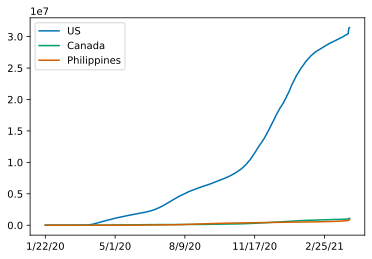

In [8]:
conf_g_df_agg.loc["US"].plot()
conf_g_df_agg.loc["Canada"].plot()
conf_g_df_agg.loc["Philippines"].plot()
plt.legend()
plt.savefig("../images/studyconf.png")

### Calculate a good measure
Find a good measure represented as a number, describing the spread of the virus in a country

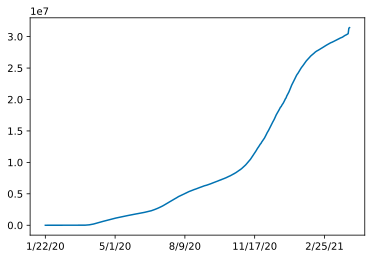

In [9]:
conf_g_df_agg.loc["US"][:].plot()
plt.savefig("../images/usconf-2.png")

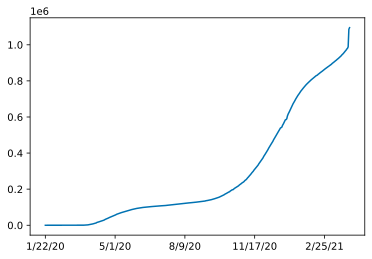

In [10]:
conf_g_df_agg.loc["Canada"][:].plot()
plt.savefig("../images/canconf-2.png")

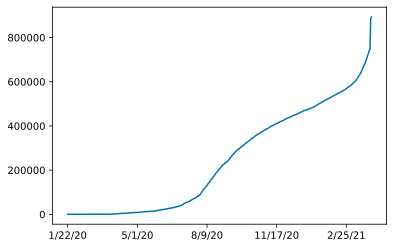

In [11]:
conf_g_df_agg.loc["Philippines"][:].plot()
plt.savefig("../images/phiconf-2.png")

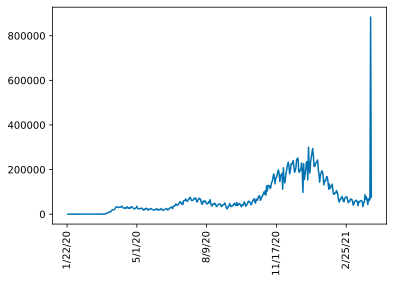

In [12]:
# calculate the first derivative of the curve
us_diff = conf_g_df_agg.loc["US"].diff().plot()
us_diff.set_xticklabels(us_diff.get_xticklabels(), rotation=90)
plt.savefig("../images/us-diff.png")

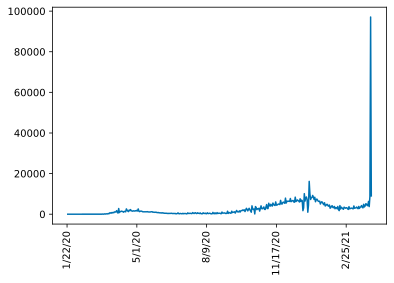

In [13]:
# calculate the first derivative of the curve
can_diff = conf_g_df_agg.loc["Canada"].diff().plot()
can_diff.set_xticklabels(can_diff.get_xticklabels(), rotation=90)
plt.savefig("../images/can-diff.png")

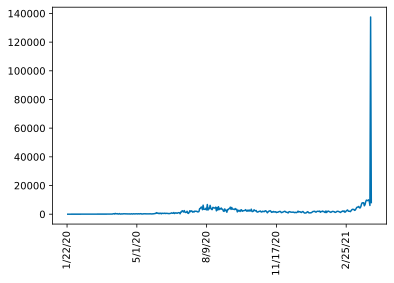

In [14]:
# calculate the first derivative of the curve
phil_diff = conf_g_df_agg.loc["Philippines"].diff().plot()
phil_diff.set_xticklabels(phil_diff.get_xticklabels(), rotation=90)
plt.savefig("../images/phil-diff.png")

In [15]:
# find the maxmimum infection rate for US
conf_g_df_agg.loc["US"].diff().max()

883775.0

In [16]:
# find the maxmimum infection rate for Canada
conf_g_df_agg.loc["Canada"].diff().max()

97097.0

In [17]:
# find the maxmimum infection rate for Philippines
conf_g_df_agg.loc["Philippines"].diff().max()

137495.0

In [18]:
# find the maximum infection rate for all the countries
countries = list(conf_g_df_agg.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(conf_g_df_agg.loc[c].diff().max())
conf_g_df_agg["max_infection_rate"] = max_infection_rates

In [19]:
conf_g_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/13/21,4/14/21,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,56226,56254,56290,56294,56322,56384,56454,57364,57492,1485.0
Albania,0,0,0,0,0,0,0,0,0,0,...,122767,123216,123641,124134,124419,124723,125157,128752,128959,3595.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,116543,116657,116750,116836,116946,117061,117192,118799,118975,1607.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,11687,11732,11809,11850,11888,11944,12010,12614,12641,604.0
Angola,0,0,0,0,0,0,0,0,0,0,...,21914,21961,22031,22063,22132,22182,22311,23697,23841,1386.0


In [20]:
#conf_g_df_agg.to_csv(r'../data/covidts-041920/conf_g_agg.csv', index=True, header=True)
#print(conf_g_df_agg)

In [21]:
# new df with infection rate column
corona_inf_df = pd.DataFrame(conf_g_df_agg["max_infection_rate"])
corona_inf_df.head()

,max_infection_rate
Country/Region,
Afghanistan,1485.0
Albania,3595.0
Algeria,1607.0
Andorra,604.0
Angola,1386.0


In [38]:
dfgcases = conf_g_df_agg.T
dfgcases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [40]:
dfgcases.describe()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,4.380000e+02,438.000000,438.000000,438.000000,...,4.380000e+02,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,30959.296804,28173.477169,47282.273973,3729.894977,7325.173516,169.376712,7.637211e+05,69392.755708,17700.251142,144203.420091,...,1.211475e+06,13317.394977,38827.744292,0.452055,56411.913242,944.664384,57917.726027,1409.207763,18902.746575,9854.054795
std,20853.567923,37748.329901,42279.579000,4036.792242,8377.796045,263.213954,8.163078e+05,68079.114027,11460.245445,180798.252594,...,1.493440e+06,24594.782724,33384.547274,0.780912,55135.043685,772.007926,72175.129184,1059.653836,26018.221194,12557.521897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4132.250000,869.000000,5599.250000,754.250000,45.000000,25.000000,6.095000e+03,3332.750000,6941.250000,15873.750000,...,2.101695e+05,708.000000,2419.000000,0.000000,416.000000,288.000000,375.000000,52.250000,267.000000,36.250000
50%,38111.000000,9005.000000,42817.500000,1098.000000,2373.500000,94.000000,3.752400e+05,43168.500000,25385.000000,26475.500000,...,3.317380e+05,1553.500000,40205.500000,0.000000,42431.500000,1035.000000,20964.000000,1931.500000,11488.500000,6271.500000
75%,48670.250000,49025.750000,92473.250000,7371.000000,16254.750000,148.000000,1.501956e+06,148592.750000,28045.250000,324404.000000,...,1.869776e+06,10320.750000,75059.500000,1.000000,108040.250000,1400.750000,110761.000000,2083.750000,18310.000000,11330.000000
max,57492.000000,128959.000000,118975.000000,12641.000000,23841.000000,1201.000000,2.604157e+06,205128.000000,29469.000000,584205.000000,...,4.393330e+06,152089.000000,85503.000000,3.000000,178094.000000,2733.000000,274690.000000,5582.000000,90389.000000,37369.000000


In [41]:
dfgcases = dfgcases.rename({"Country/Region":"Date"}, axis=1)
dfgcases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [42]:
# add a column that sums the global cases for each date
dfgcases ['totals'] = dfgcases.sum(axis=1)
dfgcases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,totals
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,557.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,655.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,941.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1433.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2118.0


In [43]:
# table of global cases totals
dfgcasestotals = dfgcases[['totals']]
dfgcasestotals.head()

Country/Region,totals
1/22/20,557.0
1/23/20,655.0
1/24/20,941.0
1/25/20,1433.0
1/26/20,2118.0


In [44]:
# export to csv
dfgcasestotals.to_csv(r'../data/itcglobalcases.csv', index=True, header=True)

### ________________________________________________________________
###  
### IMPORT DATA - DEATHS 

In [22]:
#confirmed global deaths
conf_gd = pd.read_csv("../data/covidts-041920/time_series_covid19_deaths_global.csv")
conf_gd.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3123,3126,3130,3134,3137,3141,3144,3148,3152,3155
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,120,120,120,121,121,121,121,123,123,123
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,549,550,553,554,554,557,557,560,561,561
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,30,30,30,30,31,31,31,31,31,31
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,57350,57647,57779,57957,58174,58542,58925,59084,59164,59228
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,3697,3720,3735,3753,3775,3794,3817,3835,3859,3878
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54


In [23]:
conf_gd.shape

(274, 457)

In [24]:
conf_gd = conf_gd.drop(["Lat", "Long","4/1/21","4/2/21","4/3/21","4/4/21","4/5/21","4/6/21","4/7/21","4/8/21", "4/9/21", "4/10/21","4/11/21","4/12/21","4/15/21","4/16/21","4/17/21","4/18/21"], axis=1)
conf_gd.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/13/21,4/14/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,2466,2467,2467,2469,2470,2472,2476,2484,2529,2532
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2171,2184,2192,2204,2210,2216,2227,2235,2326,2331
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3069,3071,3074,3077,3080,3084,3089,3093,3137,3141
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,114,114,114,115,115,115,115,115,121,121
4,NaN,Angola,0,0,0,0,0,0,0,0,...,532,532,532,533,533,534,536,537,554,557


In [25]:
conf_gd_agg = conf_gd.groupby("Country/Region").sum()
conf_gd_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/13/21,4/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2466,2467,2467,2469,2470,2472,2476,2484,2529,2532
Albania,0,0,0,0,0,0,0,0,0,0,...,2171,2184,2192,2204,2210,2216,2227,2235,2326,2331
Algeria,0,0,0,0,0,0,0,0,0,0,...,3069,3071,3074,3077,3080,3084,3089,3093,3137,3141
Andorra,0,0,0,0,0,0,0,0,0,0,...,114,114,114,115,115,115,115,115,121,121
Angola,0,0,0,0,0,0,0,0,0,0,...,532,532,532,533,533,534,536,537,554,557


In [26]:
dfdeath = conf_gd_agg.T
dfdeath.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
dfdeath.describe()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.0,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,1186.070938,550.020595,1483.832952,57.263158,186.041190,4.919908,19254.494279,1233.203661,495.592677,2518.633867,...,49545.048055,145.075515,303.807780,0.0,515.583524,18.599542,592.425629,388.940503,308.610984,338.890160
std,905.162770,656.529859,1071.431205,33.544874,195.703385,6.397426,20760.934817,1220.416314,404.956328,3141.877089,...,37303.875941,244.306444,273.663373,0.0,520.286874,17.025138,798.605365,280.501862,354.911993,495.035928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,31.000000,502.000000,48.000000,2.000000,3.000000,305.000000,45.000000,97.000000,618.000000,...,31467.000000,19.000000,10.000000,0.0,10.000000,0.000000,2.000000,8.000000,7.000000,4.000000
50%,1402.000000,266.000000,1475.000000,53.000000,105.000000,3.000000,8050.000000,864.000000,583.000000,733.000000,...,41564.000000,43.000000,298.000000,0.0,358.000000,30.000000,141.000000,562.000000,282.000000,189.000000
75%,1969.000000,1016.000000,2609.000000,79.000000,372.000000,5.000000,41041.000000,2503.000000,908.000000,4530.000000,...,64500.000000,95.000000,612.000000,0.0,960.000000,35.000000,1000.000000,606.000000,367.000000,309.000000
max,2532.000000,2331.000000,3141.000000,121.000000,557.000000,31.000000,58542.000000,3794.000000,910.000000,9779.000000,...,127407.000000,1647.000000,634.000000,0.0,1834.000000,35.000000,2923.000000,1083.000000,1229.000000,1548.000000


In [28]:
dfdeath = dfdeath.rename({"Country/Region":"Date"}, axis=1)
dfdeath.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# add a column that sums the global deaths for each date
dfdeath ['totals'] = dfdeath.sum(axis=1)
dfdeath.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,totals
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56


In [34]:
# create a table of just global death totals
dfdeathtotals = dfdeath[['totals']]
dfdeathtotals.head()

Country/Region,totals
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56


In [37]:
# export to csv
dfdeathtotals.to_csv(r'../data/itcglobaldeaths.csv', index=True, header=True)